# <b> GRIP TASK1: Prediction using Supervised ML <b>
    
Presented by Anusha Kaligota

## Problem Discription

_Problem_statement_: Predict the percentage of a student based on the number of study hours. 

_Data_given_: number of study hours(independent variable/X) and percentage of student(target variable/ Y)

_type_of_problem_: supervised learning and regression problen, because as target y is given and it has numeric values.

_type_of_algorithm_:  Linear regression

## import libraries

In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Read the data

In [4]:
url="https://bit.ly/w-data"
percentmarks= pd.read_csv(url)

In [5]:
percentmarks.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## EDA

In [6]:
percentmarks.shape

(25, 2)

In [7]:
percentmarks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
percentmarks.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

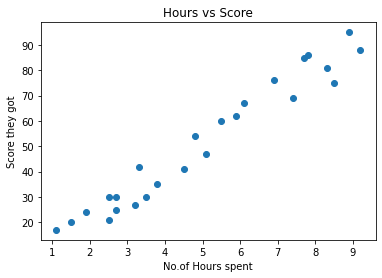

In [9]:
plt.scatter(percentmarks["Hours"], percentmarks["Scores"])
plt.title("Hours vs Score")

# add lables
plt.xlabel('No.of Hours spent')
plt.ylabel('Score they got')

# show plot
plt.show()

## Ckecking Null values

In [10]:
percentmarks.isna().sum()

Hours     0
Scores    0
dtype: int64

## train test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=percentmarks.drop(["Scores"],axis=1)
Y=percentmarks["Scores"]

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.33, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16, 1)
(9, 1)
(16,)
(9,)


## model building

In [15]:
import statsmodels.formula.api as smf

C:\New folder\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
data=pd.concat([X_train,Y_train],axis=1)
data

,Hours,Scores
5,1.5,20
2,3.2,27
12,4.5,41
15,8.9,95
3,8.5,75
4,3.5,30
20,2.7,30
17,1.9,24
21,4.8,54
18,6.1,67


In [17]:
model =  smf.ols(formula="Scores ~ Hours", data=data).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     292.6
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           8.85e-11
Time:                        09:16:35   Log-Likelihood:                -50.397
No. Observations:                  16   AIC:                             104.8
Df Residuals:                      14   BIC:                             106.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4050      3.334      1.021      0.3

C:\New folder\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


_observations_: R squared value=0.95,Prob(F-statistic)<0.05 model is significant

In [19]:
print("parameters :", model.params)
print("R squared :", model.rsquared)

parameters : Intercept    3.405030
Hours        9.650291
dtype: float64
R squared : 0.9543348637719865


## Prediction on Test data

In [20]:
Y_pred_train=model.predict(X_train)
print(type(X_train))
print(X_train.head())
Y_pred_test=model.predict(X_test)

<class 'pandas.core.frame.DataFrame'>
    Hours
5     1.5
2     3.2
12    4.5
15    8.9
3     8.5


## Evaluation of model

In [21]:
from sklearn import metrics

In [22]:
print ("Mean Absolute Error (MAE) - Train data : ", metrics.mean_absolute_error(Y_train, Y_pred_train))

print ("Mean Squared Error (MSE) - Train data : ", metrics.mean_squared_error(Y_train, Y_pred_train))

print ("Root Mean Squared Error (RMSE) - Train data : ", np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))

print("Co-efficient of determination (R2 Score): ", metrics.r2_score(Y_train, Y_pred_train))


Mean Absolute Error (MAE) - Train data :  5.091967284742894
Mean Squared Error (MSE) - Train data :  31.871411016139174
Root Mean Squared Error (RMSE) - Train data :  5.645477040617487
Co-efficient of determination (R2 Score):  0.9543348637719865


In [23]:
print ("Mean Absolute Error (MAE) - Test data : ", metrics.mean_absolute_error(Y_test, Y_pred_test))

print ("Mean Squared Error (MSE) - Test data : ", metrics.mean_squared_error(Y_test, Y_pred_test))

print ("Root Mean Squared Error (RMSE) - Test data : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))

print("Co-efficient of determination (R2 Score): ", metrics.r2_score(Y_test, Y_pred_test))


Mean Absolute Error (MAE) - Test data :  4.564015037730868
Mean Squared Error (MSE) - Test data :  24.074686364260995
Root Mean Squared Error (RMSE) - Test data :  4.906596209620371
Co-efficient of determination (R2 Score):  0.9435488190277577


## Visualization of Train and Test results

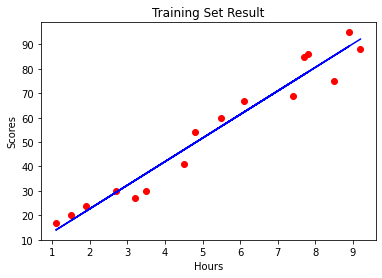

In [24]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,Y_pred_train, color='blue')
plt.title('Training Set Result')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()



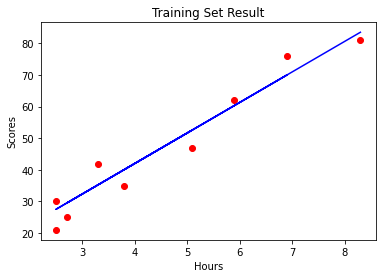

In [25]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,Y_pred_test, color='blue')
plt.title('Training Set Result')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()



## Residual Plots

In [26]:
import statsmodels.api as sm

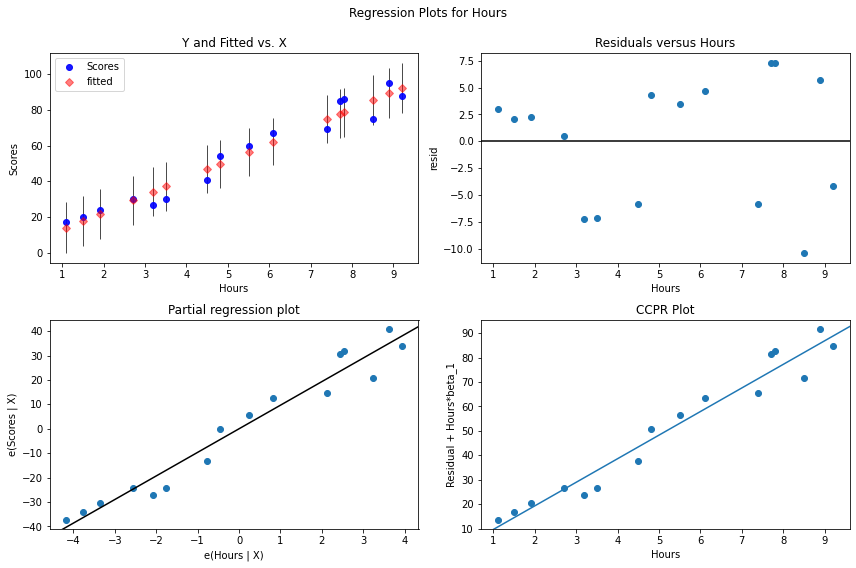

In [27]:
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(model, "Hours",fig=fig)
plt.show()

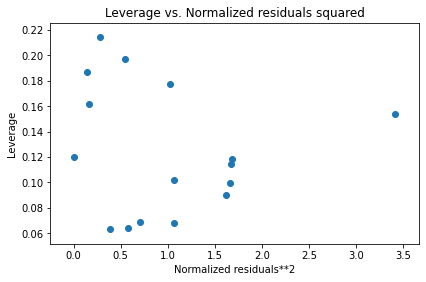

In [28]:
fig = sm.graphics.plot_leverage_resid2(model)
fig.tight_layout(pad=1.0)

# What will be predicted score if a student studies for 9.25 hrs/ day? 

In [29]:
Data={"Hours":[9.25]}
new_df=pd.DataFrame(Data)
print(new_df)
print(type(new_df))

   Hours
0   9.25
<class 'pandas.core.frame.DataFrame'>


In [30]:
pred_new=model.predict(new_df)
pred_new

0    92.67022
dtype: float64

_<b>Conclusion<b>_: the linear regression model of student data can easily predict the student score 92.67 who studies for 9.25hrs/day.

                                            Thank you!